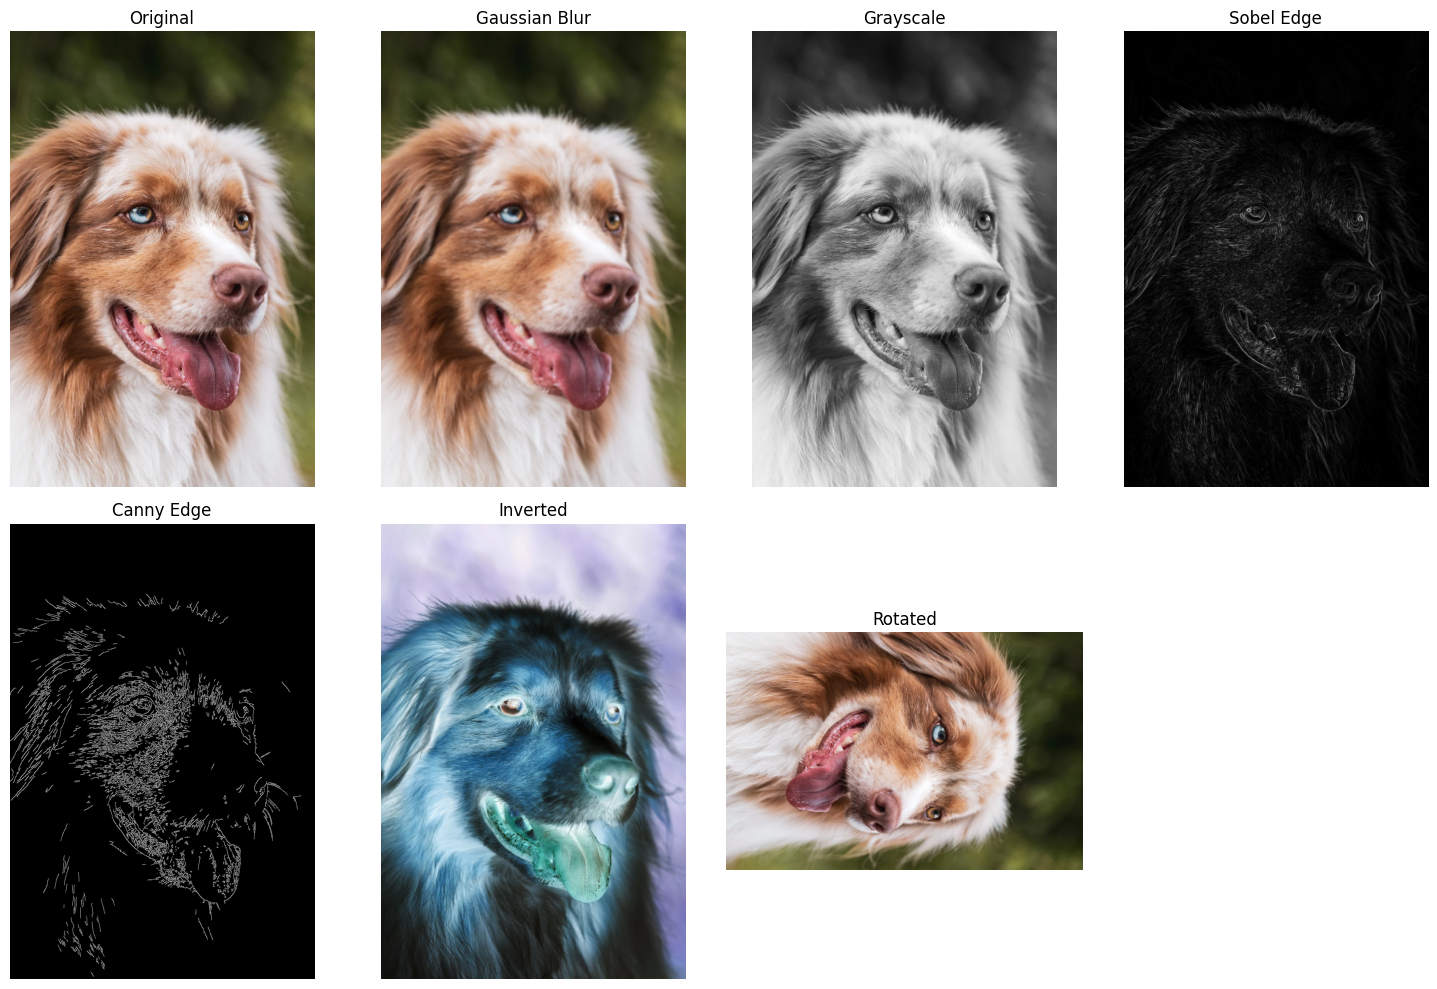

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (BGR â†’ RGB)
img_path = r"C:\Users\ghwns\HJ_git\CV-Projects\dl-chapter-notebooks\Chapter1\chapter1_dog.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Transformations
original = img.copy()
blurred = cv2.GaussianBlur(original, (11, 11), 0)
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

# Sobel edge detection
sx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sx, sy)
sobel = np.uint8(sobel / sobel.max() * 255)

# Canny edge detection
canny = cv2.Canny(gray, 100, 200)

# Negative and rotation
inverted = 255 - original
rotated = cv2.rotate(original, cv2.ROTATE_90_CLOCKWISE)

# Visualization
titles = ['Original', 'Gaussian Blur', 'Grayscale', 'Sobel Edge', 'Canny Edge', 'Inverted', 'Rotated']
images = [original, blurred, gray, sobel, canny, inverted, rotated]

plt.figure(figsize=(15, 10))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 4, i + 1)
    cmap = 'gray' if image.ndim == 2 else None
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()